<a href="https://colab.research.google.com/github/chengine/aa273spring2024/blob/main/GTSAM/AA273_GTSAM_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GTSAM test
https://github.com/borglab/gtsam/blob/develop/python/gtsam/examples/Pose2SLAMExample.py

In [ ]:
!pip install gtsam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 8.9 MB/s eta 0:00:00


In [ ]:
import gtsam
import math
import gtsam.utils.plot as gtsam_plot
import matplotlib.pyplot as plt

In [ ]:
# Create noise models
PRIOR_NOISE = gtsam.noiseModel.Diagonal.Sigmas(gtsam.Point3(0.3, 0.3, 0.1))
ODOMETRY_NOISE = gtsam.noiseModel.Diagonal.Sigmas(
    gtsam.Point3(0.2, 0.2, 0.1))

# 1. Create a factor graph container and add factors to it
graph = gtsam.NonlinearFactorGraph()

# 2a. Add a prior on the first pose, setting it to the origin
# A prior factor consists of a mean and a noise ODOMETRY_NOISE (covariance matrix)
graph.add(gtsam.PriorFactorPose2(1, gtsam.Pose2(0, 0, 0), PRIOR_NOISE))

# 2b. Add odometry factors
# Create odometry (Between) factors between consecutive poses
graph.add(
    gtsam.BetweenFactorPose2(1, 2, gtsam.Pose2(2, 0, 0), ODOMETRY_NOISE))
graph.add(
    gtsam.BetweenFactorPose2(2, 3, gtsam.Pose2(2, 0, math.pi / 2),
                                ODOMETRY_NOISE))
graph.add(
    gtsam.BetweenFactorPose2(3, 4, gtsam.Pose2(2, 0, math.pi / 2),
                                ODOMETRY_NOISE))
graph.add(
    gtsam.BetweenFactorPose2(4, 5, gtsam.Pose2(2, 0, math.pi / 2),
                                ODOMETRY_NOISE))

In [ ]:
# 2c. Add the loop closure constraint
# This factor encodes the fact that we have returned to the same pose. In real
# systems, these constraints may be identified in many ways, such as appearance-based
# techniques with camera images. We will use another Between Factor to enforce this constraint:
graph.add(
    gtsam.BetweenFactorPose2(5, 2, gtsam.Pose2(2, 0, math.pi / 2),
                                ODOMETRY_NOISE))
print("\nFactor Graph:\n{}".format(graph))  # print

# 3. Create the data structure to hold the initial_estimate estimate to the
# solution. For illustrative purposes, these have been deliberately set to incorrect values
initial_estimate = gtsam.Values()
initial_estimate.insert(1, gtsam.Pose2(0.5, 0.0, 0.2))
initial_estimate.insert(2, gtsam.Pose2(2.3, 0.1, -0.2))
initial_estimate.insert(3, gtsam.Pose2(4.1, 0.1, math.pi / 2))
initial_estimate.insert(4, gtsam.Pose2(4.0, 2.0, math.pi))
initial_estimate.insert(5, gtsam.Pose2(2.1, 2.1, -math.pi / 2))
print("\nInitial Estimate:\n{}".format(initial_estimate))  # print


Factor Graph:
NonlinearFactorGraph: size: 6

Factor 0: PriorFactor on 1
  prior mean:  (0, 0, 0)
  noise model: diagonal sigmas [0.3; 0.3; 0.1];

Factor 1: BetweenFactor(1,2)
  measured:  (2, 0, 0)
  noise model: diagonal sigmas [0.2; 0.2; 0.1];

Factor 2: BetweenFactor(2,3)
  measured:  (2, 0, 1.57079633)
  noise model: diagonal sigmas [0.2; 0.2; 0.1];

Factor 3: BetweenFactor(3,4)
  measured:  (2, 0, 1.57079633)
  noise model: diagonal sigmas [0.2; 0.2; 0.1];

Factor 4: BetweenFactor(4,5)
  measured:  (2, 0, 1.57079633)
  noise model: diagonal sigmas [0.2; 0.2; 0.1];

Factor 5: BetweenFactor(5,2)
  measured:  (2, 0, 1.57079633)
  noise model: diagonal sigmas [0.2; 0.2; 0.1];



Initial Estimate:
Values with 5 values:
Value 1: (gtsam::Pose2)
(0.5, 0, 0.2)

Value 2: (gtsam::Pose2)
(2.3, 0.1, -0.2)

Value 3: (gtsam::Pose2)
(4.1, 0.1, 1.57079633)

Value 4: (gtsam::Pose2)
(4, 2, 3.14159265)

Value 5: (gtsam::Pose2)
(2.1, 2.1, -1.57079633)




In [ ]:
# 4. Optimize the initial values using a Gauss-Newton nonlinear optimizer
# The optimizer accepts an optional set of configuration parameters,
# controlling things like convergence criteria, the type of linear
# system solver to use, and the amount of information displayed during
# optimization. We will set a few parameters as a demonstration.
parameters = gtsam.GaussNewtonParams()

# Stop iterating once the change in error between steps is less than this value
parameters.setRelativeErrorTol(1e-5)
# Do not perform more than N iteration steps
parameters.setMaxIterations(100)
# Create the optimizer ...
optimizer = gtsam.GaussNewtonOptimizer(graph, initial_estimate, parameters)
# ... and optimize
result = optimizer.optimize()
print("Final Result:\n{}".format(result))

Final Result:
Values with 5 values:
Value 1: (gtsam::Pose2)
(-2.7684295e-20, -8.15199774e-20, -3.57721281e-20)

Value 2: (gtsam::Pose2)
(2, -1.89295335e-19, -5.34287057e-20)

Value 3: (gtsam::Pose2)
(4, -3.42174082e-11, 1.57079633)

Value 4: (gtsam::Pose2)
(4, 2, 3.14159265)

Value 5: (gtsam::Pose2)
(2, 2, -1.57079633)




X1 covariance:
[[ 9.00000000e-02 -2.12500911e-18 -7.19466295e-18]
 [-2.12500911e-18  9.00000000e-02 -5.75539616e-17]
 [-7.19466295e-18 -5.75539616e-17  1.00000000e-02]]

X2 covariance:
[[ 1.30000000e-01 -2.52182245e-17 -2.01024710e-17]
 [-2.52182245e-17  1.70000000e-01  2.00000000e-02]
 [-2.01024710e-17  2.00000000e-02  2.00000000e-02]]

X3 covariance:
[[ 3.62000000e-01 -3.29296371e-12  6.20000000e-02]
 [-3.29296189e-12  1.62000000e-01 -2.00000000e-03]
 [ 6.20000000e-02 -2.00000000e-03  2.65000000e-02]]

X4 covariance:
[[ 0.268 -0.128  0.048]
 [-0.128  0.378 -0.068]
 [ 0.048 -0.068  0.028]]

X5 covariance:
[[ 0.202   0.036  -0.018 ]
 [ 0.036   0.26   -0.051 ]
 [-0.018  -0.051   0.0265]]



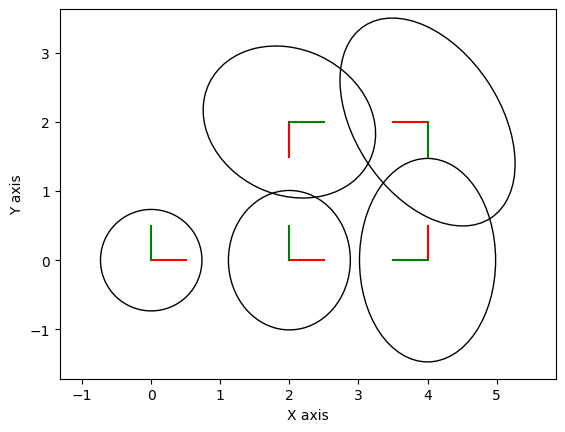

In [ ]:
# 5. Calculate and print marginal covariances for all variables
marginals = gtsam.Marginals(graph, result)
for i in range(1, 6):
    print("X{} covariance:\n{}\n".format(i,
                                            marginals.marginalCovariance(i)))

for i in range(1, 6):
    gtsam_plot.plot_pose2(0, result.atPose2(i), 0.5,
                            marginals.marginalCovariance(i))

plt.axis('equal')
plt.show()

https://github.com/borglab/gtsam/blob/develop/python/gtsam/examples/PlanarSLAMExample.py

In [ ]:
import numpy as np
from gtsam.symbol_shorthand import L, X

In [ ]:
# Create noise models
PRIOR_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.3, 0.3, 0.1]))
ODOMETRY_NOISE = gtsam.noiseModel.Diagonal.Sigmas(0.01 * np.array([0.2, 0.2, 0.1]))
MEASUREMENT_NOISE = gtsam.noiseModel.Diagonal.Sigmas(0.01 * np.array([0.1, 0.2]))

In [ ]:
"""Main runner"""

# Create an empty nonlinear factor graph
graph = gtsam.NonlinearFactorGraph()

# Create the keys corresponding to unknown variables in the factor graph
X1 = X(1)
X2 = X(2)
X3 = X(3)
X4 = X(4)
L1 = L(1)
L2 = L(2)

# Add a prior on pose X1 at the origin. A prior factor consists of a mean and a noise model
graph.add(
    gtsam.PriorFactorPose2(X1, gtsam.Pose2(0.0, 0.0, 0.0), PRIOR_NOISE))

# Add odometry factors between X1,X2 and X2,X3, respectively
graph.add(
    gtsam.BetweenFactorPose2(X1, X2, gtsam.Pose2(2.0, 0.0, 0.0),
                                ODOMETRY_NOISE))
graph.add(
    gtsam.BetweenFactorPose2(X2, X3, gtsam.Pose2(2.0, 0.0, 0.0),
                                ODOMETRY_NOISE))

graph.add(
    gtsam.BetweenFactorPose2(X3, X4, gtsam.Pose2(2.0, 0.0, 0.0),
                                ODOMETRY_NOISE))

graph.add(
    gtsam.BetweenFactorPose2(X1, X4, gtsam.Pose2(6.0, 0.0, 0.0),
                                ODOMETRY_NOISE))

# Add Range-Bearing measurements to two different landmarks L1 and L2
graph.add(
    gtsam.BearingRangeFactor2D(X1, L1, gtsam.Rot2.fromDegrees(45),
                                np.sqrt(4.0 + 4.0), MEASUREMENT_NOISE))
graph.add(
    gtsam.BearingRangeFactor2D(X2, L1, gtsam.Rot2.fromDegrees(90), 2.0,
                                MEASUREMENT_NOISE))
graph.add(
    gtsam.BearingRangeFactor2D(X3, L2, gtsam.Rot2.fromDegrees(90), 2.0,
                                MEASUREMENT_NOISE))

# Print graph
print("Factor Graph:\n{}".format(graph))

# Create (deliberately inaccurate) initial estimate
initial_estimate = gtsam.Values()
initial_estimate.insert(X1, gtsam.Pose2(-0.25, 0.20, 0.15))
initial_estimate.insert(X2, gtsam.Pose2(2.30, 0.10, -0.20))
initial_estimate.insert(X3, gtsam.Pose2(4.10, 0.10, 0.10))
initial_estimate.insert(X4, gtsam.Pose2(7.10, -3.10, 0.10))
initial_estimate.insert(L1, gtsam.Point2(14.0, 12.10))
initial_estimate.insert(L2, gtsam.Point2(14.10, 11.80))

# Print
print("Initial Estimate:\n{}".format(initial_estimate))

# Optimize using Levenberg-Marquardt optimization. The optimizer
# accepts an optional set of configuration parameters, controlling
# things like convergence criteria, the type of linear system solver
# to use, and the amount of information displayed during optimization.
# Here we will use the default set of parameters.  See the
# documentation for the full set of parameters.
params = gtsam.LevenbergMarquardtParams()
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initial_estimate,
                                                params)
result = optimizer.optimize()
print("\nFinal Result:\n{}".format(result))

# Calculate and print marginal covariances for all variables
marginals = gtsam.Marginals(graph, result)
for (key, s) in [(X1, "X1"), (X2, "X2"), (X3, "X3"), (X4, "X4"),
                    (L1, "L1"), (L2, "L2")]:
    print("{} covariance:\n{}\n".format(s,
                                        marginals.marginalCovariance(key)))

Factor Graph:
NonlinearFactorGraph: size: 8

Factor 0: PriorFactor on x1
  prior mean:  (0, 0, 0)
  noise model: diagonal sigmas [0.3; 0.3; 0.1];

Factor 1: BetweenFactor(x1,x2)
  measured:  (2, 0, 0)
  noise model: diagonal sigmas [0.002; 0.002; 0.001];

Factor 2: BetweenFactor(x2,x3)
  measured:  (2, 0, 0)
  noise model: diagonal sigmas [0.002; 0.002; 0.001];

Factor 3: BetweenFactor(x3,x4)
  measured:  (2, 0, 0)
  noise model: diagonal sigmas [0.002; 0.002; 0.001];

Factor 4: BetweenFactor(x1,x4)
  measured:  (6, 0, 0)
  noise model: diagonal sigmas [0.002; 0.002; 0.001];

Factor 5: BearingRangeFactor
Factor 5:   keys = { x1 l1 }
  noise model: diagonal sigmas [0.001; 0.002];
ExpressionFactor with measurement: bearing : 0.785398163
range  2.82842712

Factor 6: BearingRangeFactor
Factor 6:   keys = { x2 l1 }
  noise model: diagonal sigmas [0.001; 0.002];
ExpressionFactor with measurement: bearing : 1.57079633
range  2

Factor 7: BearingRangeFactor
Factor 7:   keys = { x3 l2 }
  noise

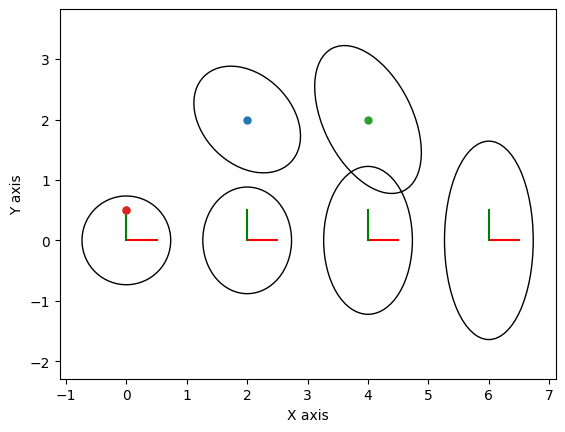

In [ ]:
# for i in range(1, 3):
#     gtsam_plot.plot_pose2(0, result.atPose2(i), 0.5,
#                             marginals.marginalCovariance(i))

for (key, s) in [(X1, "X1"), (X2, "X2"), (X3, "X3"), (X4, "X4")]:

    m = marginals.marginalCovariance(key)
    # print("{} covariance:\n{}\n".format(s, m))
    gtsam_plot.plot_pose2(0, result.atPose2(key), 0.5, m)

for (key, s) in [(L1, "L1"), (L2, "L2")]:

    m = marginals.marginalCovariance(key)
    gtsam_plot.plot_point2(0, result.atPoint2(key), 0.5, m)

plt.axis('equal')
plt.show()

# For AA 273

In [ ]:
"""Main runner"""

# Create an empty nonlinear factor graph
graph = gtsam.NonlinearFactorGraph()

# Create the keys corresponding to unknown variables in the factor graph
X1 = X(1)
X2 = X(2)
L1 = L(1)
L2 = L(2)
L3 = L(3)

# Add a prior on pose X1 at the origin. A prior factor consists of a mean and a noise model
graph.add(
    gtsam.PriorFactorPose2(X1, gtsam.Pose2(0.0, 0.0, 0.0), PRIOR_NOISE))

# Add odometry factors between X1,X2, respectively
graph.add(
    gtsam.BetweenFactorPose2(X1, X2, gtsam.Pose2(3.0, 0.0, 0.0),
                                ODOMETRY_NOISE))

# Add Range-Bearing measurements to two different landmarks L1 and L2
graph.add(
    gtsam.BearingRangeFactor2D(X1, L1,
                               gtsam.Rot2.fromDegrees(np.rad2deg(-2.35619449019234)),
                               np.sqrt(2),
                               MEASUREMENT_NOISE))
graph.add(
    gtsam.BearingRangeFactor2D(X1, L2,
                               gtsam.Rot2.fromDegrees(np.rad2deg(2.356194490192344837)),
                               np.sqrt(2),
                               MEASUREMENT_NOISE))
graph.add(
    gtsam.BearingRangeFactor2D(X2, L3,
                               gtsam.Rot2.fromDegrees(np.rad2deg(0.4636476090008061490)),
                               2.23606797749978980,
                               MEASUREMENT_NOISE))

# Print graph
print("Factor Graph:\n{}".format(graph))

# Create (deliberately inaccurate) initial estimate
initial_estimate = gtsam.Values()
initial_estimate.insert(X1, gtsam.Pose2(0.1, 0.2, 0.15))
initial_estimate.insert(X2, gtsam.Pose2(0.13, 0.12, -0.2))
initial_estimate.insert(L1, gtsam.Point2(14.0, 12.10))
initial_estimate.insert(L2, gtsam.Point2(14.10, 11.80))
initial_estimate.insert(L3, gtsam.Point2(14.10, 11.80))

# Print
print("Initial Estimate:\n{}".format(initial_estimate))

# Optimize using Levenberg-Marquardt optimization. The optimizer
# accepts an optional set of configuration parameters, controlling
# things like convergence criteria, the type of linear system solver
# to use, and the amount of information displayed during optimization.
# Here we will use the default set of parameters.  See the
# documentation for the full set of parameters.
params = gtsam.LevenbergMarquardtParams()
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initial_estimate,
                                                params)
result = optimizer.optimize()
print("\nFinal Result:\n{}".format(result))

# Calculate and print marginal covariances for all variables
marginals = gtsam.Marginals(graph, result)
for (key, s) in [(X1, "X1"), (X2, "X2"),
                    (L1, "L1"), (L2, "L2"), (L3, "L3")]:
    print("{} covariance:\n{}\n".format(s,
                                        marginals.marginalCovariance(key)))

Factor Graph:
NonlinearFactorGraph: size: 5

Factor 0: PriorFactor on x1
  prior mean:  (0, 0, 0)
  noise model: diagonal sigmas [0.3; 0.3; 0.1];

Factor 1: BetweenFactor(x1,x2)
  measured:  (3, 0, 0)
  noise model: diagonal sigmas [0.002; 0.002; 0.001];

Factor 2: BearingRangeFactor
Factor 2:   keys = { x1 l1 }
  noise model: diagonal sigmas [0.001; 0.002];
ExpressionFactor with measurement: bearing : -2.35619449
range  1.41421356

Factor 3: BearingRangeFactor
Factor 3:   keys = { x1 l2 }
  noise model: diagonal sigmas [0.001; 0.002];
ExpressionFactor with measurement: bearing : 2.35619449
range  1.41421356

Factor 4: BearingRangeFactor
Factor 4:   keys = { x2 l3 }
  noise model: diagonal sigmas [0.001; 0.002];
ExpressionFactor with measurement: bearing : 0.463647609
range  2.23606798


Initial Estimate:
Values with 5 values:
Value l1: (Eigen::Matrix<double, -1, 1, 0, -1, 1>)
[
	14;
	12.1
]

Value l2: (Eigen::Matrix<double, -1, 1, 0, -1, 1>)
[
	14.1;
	11.8
]

Value l3: (Eigen::Matrix<

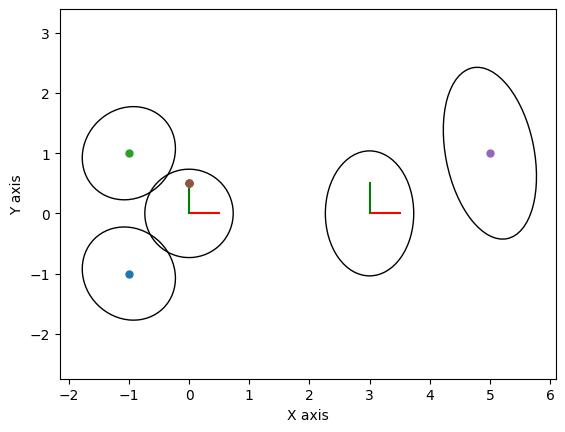

In [ ]:
for (key, s) in [(X1, "X1"), (X2, "X2")]:

    m = marginals.marginalCovariance(key)
    # print("{} covariance:\n{}\n".format(s, m))
    gtsam_plot.plot_pose2(0, result.atPose2(key), 0.5, m)

for (key, s) in [(L1, "L1"), (L2, "L2"), (L3, "L3")]:

    m = marginals.marginalCovariance(key)
    gtsam_plot.plot_point2(0, result.atPoint2(key), 0.5, m)

plt.axis('equal')
plt.show()